In [1]:
import warnings
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")


# Correct the URL to point directly to the raw CSV file
df_url ='https://raw.githubusercontent.com/AISWARYALAKSHMI128/Mentorness/main/Predicting Customer Purchase Behavior/customer_purchase_data.csv'
url_content = requests.get(df_url, verify=False).content

# Read the imported CSV data into a DataFrame
custdata = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
custdata.shape  # Display number of rows and columns

(1500, 9)

In [2]:
custdata.head(3)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1


In [3]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [4]:
custdata.size

13500

In [5]:
custdata.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [6]:
custdata.isna().sum().any()

False

In [7]:
custdata.duplicated().sum()

112

In [8]:
custdata.drop_duplicates(inplace = True)
custdata.duplicated().sum()

0

In [9]:
custdata.shape

(1388, 9)

In [10]:
features = custdata.columns[:-1].values
label = [custdata.columns[-1]]

print ("The Features are:", features)
print ("The Label is:", label)

The Features are: ['Age' 'Gender' 'AnnualIncome' 'NumberOfPurchases' 'ProductCategory'
 'TimeSpentOnWebsite' 'LoyaltyProgram' 'DiscountsAvailed']
The Label is: ['PurchaseStatus']


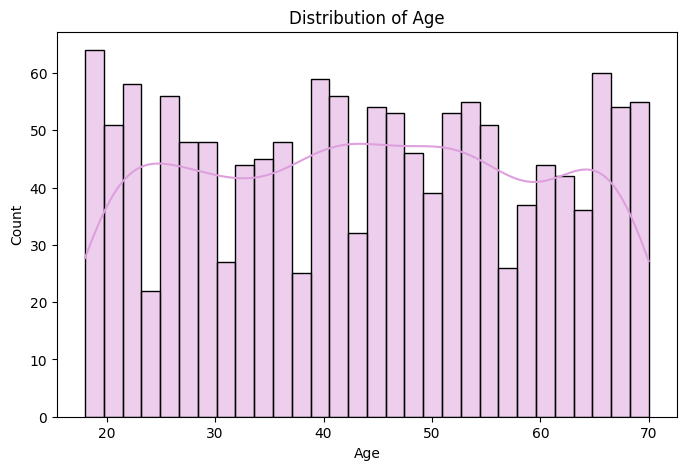

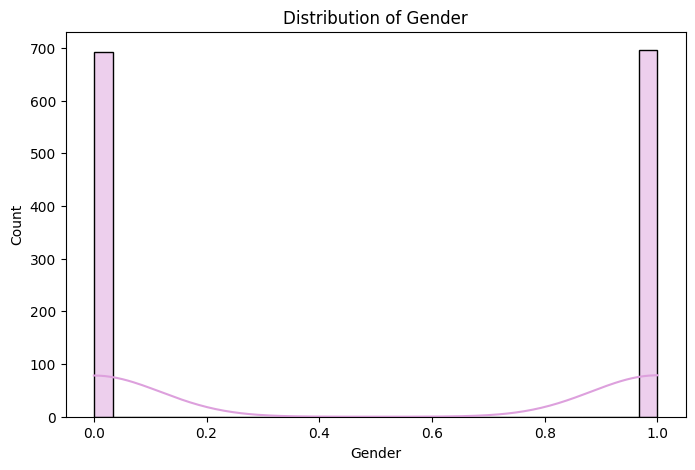

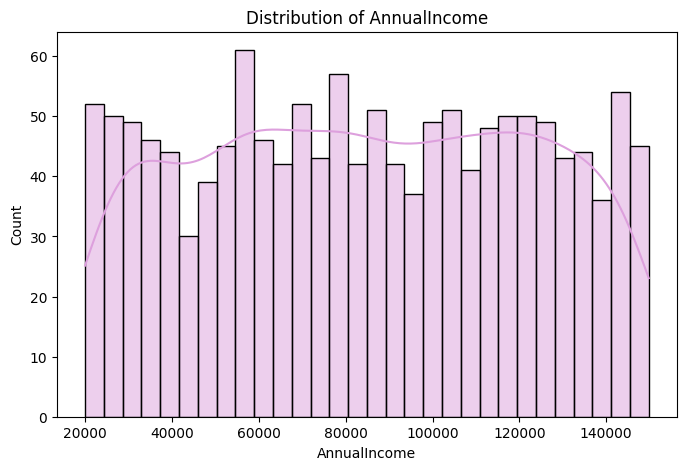

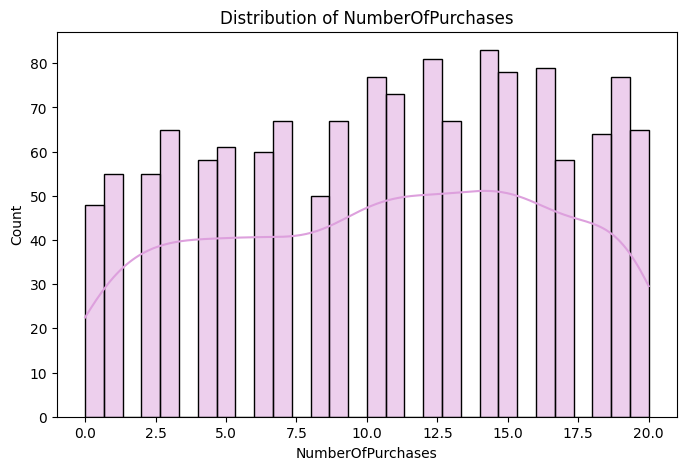

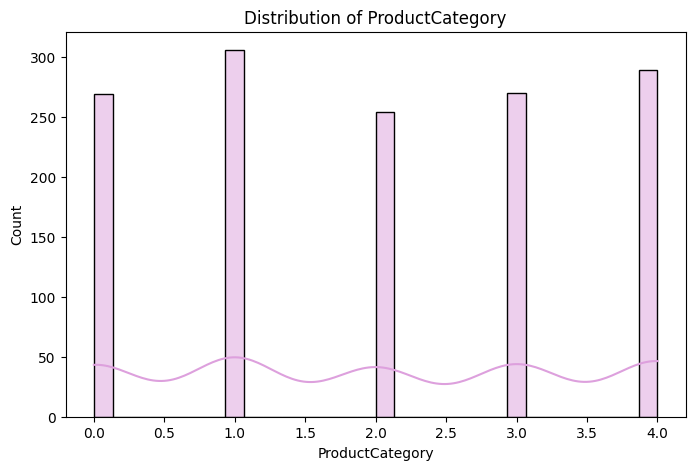

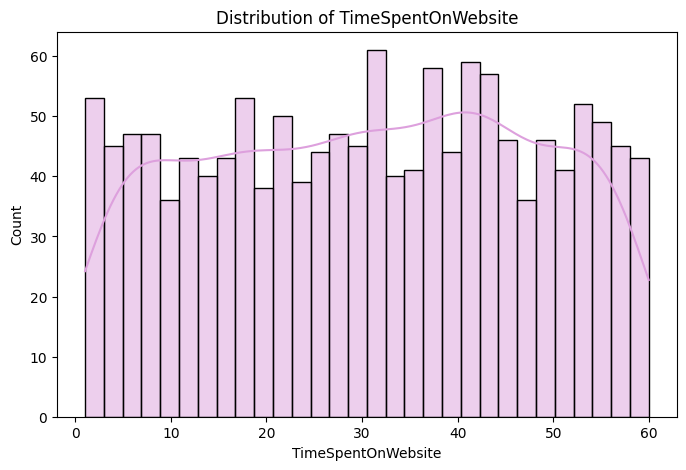

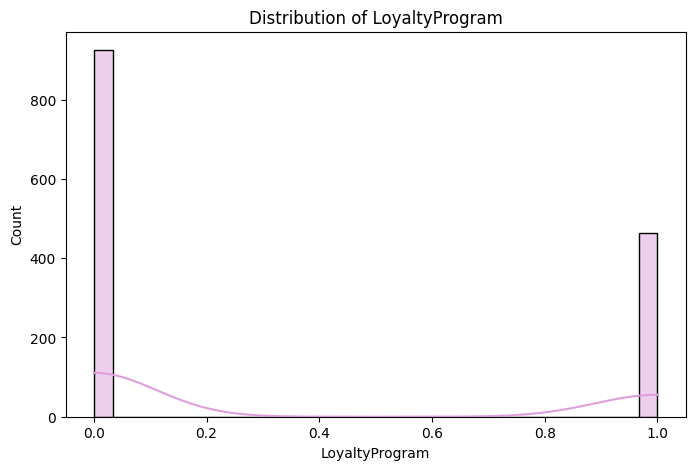

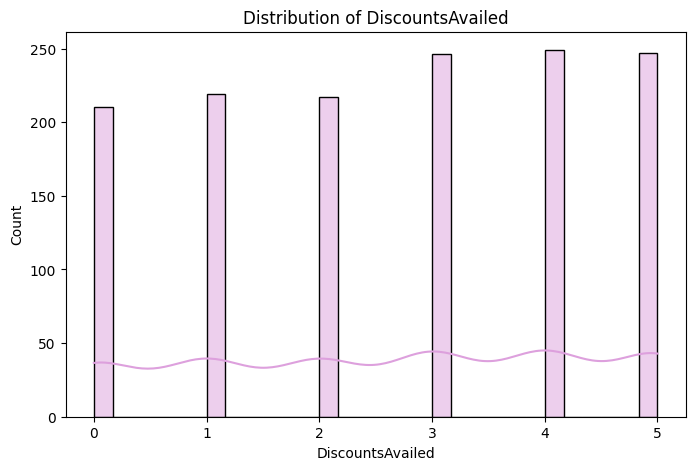

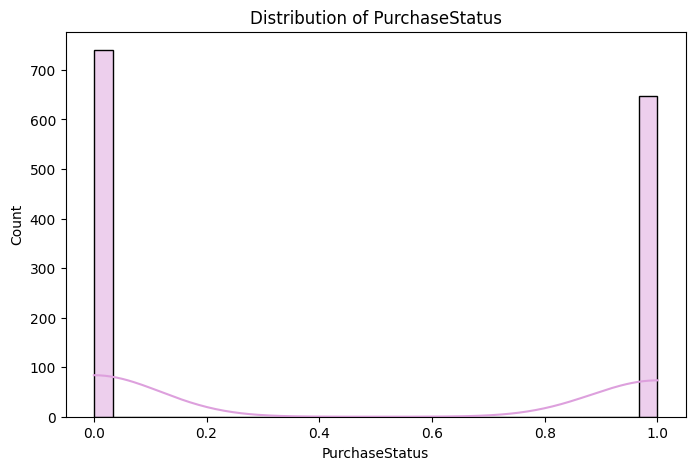

In [11]:
for column in custdata:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=custdata, x=column, kde=True, bins=30, color='#DDA0DD')
    plt.title(f'Distribution of {column}')
    plt.show()

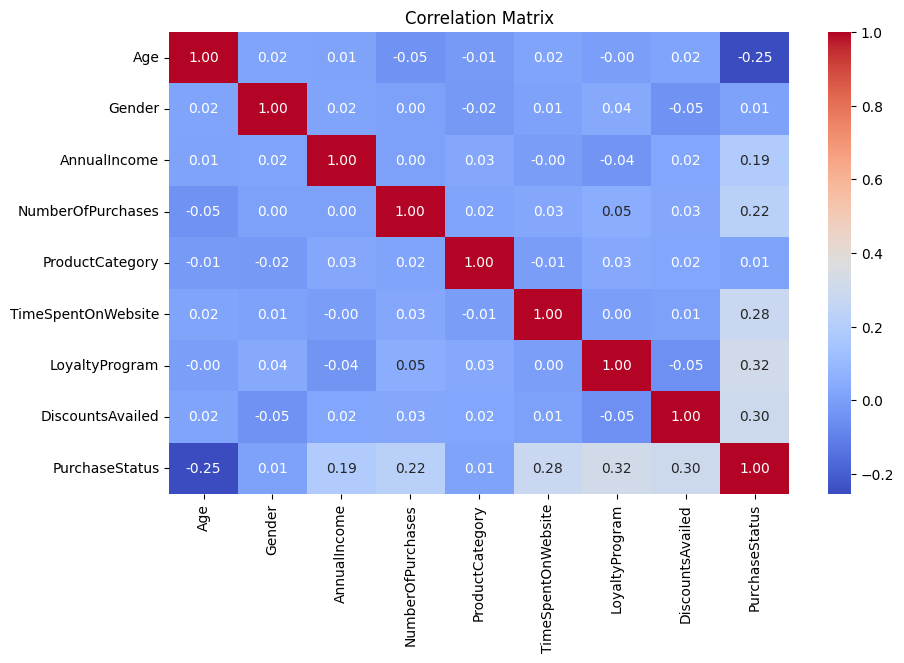

In [12]:
corr_matrix = custdata.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

1.  Strong Correlation with Target (PurchaseStatus):<br>
•	LoyaltyProgram (0.32), DiscountsAvailed (0.30), and TimeSpentOnWebsite (0.28) show the highest positive correlations with the target variable (PurchaseStatus).<br>
•	Age (-0.25) shows a moderate negative correlation with PurchaseStatus.<br>
•	These features might be strong predictors for the model.<br>
2.  Inter-feature Correlation:<br>
•	Most of the features have low correlation with each other (values close to 0), which suggests minimal multicollinearity.<br>
•	The highest inter-feature correlation is between LoyaltyProgram and DiscountsAvailed (0.32), but this is still relatively low.<br>


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC


In [14]:
X = custdata.drop('PurchaseStatus', axis=1)
y = custdata['PurchaseStatus']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**LOGISTIC REGRESSION**

In [16]:
model=LogisticRegression()

In [17]:
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
model.score(X_train,y_train)*100

73.53244078269825

**DecisionTreeClassifier**

In [19]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
model.score(X_train,y_train)*100

100.0

**RandomForestClassifier**

In [21]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
y_pred_rf = model.predict(X_test)

# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       216
           1       0.96      0.94      0.95       201

    accuracy                           0.95       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.95      0.95      0.95       417

Confusion Matrix:
 [[209   7]
 [ 13 188]]


In [24]:
model.score(X_train,y_train)*100

100.0

In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.94871795 0.88659794 0.90721649 0.86597938 0.87113402]
Mean Cross-Validation Score: 0.8959291567538991


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the tuned model on the test set
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9186360031720857
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       216
           1       0.96      0.94      0.95       201

    accuracy                           0.95       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.95      0.95      0.95       417

Confusion Matrix:
 [[209   7]
 [ 13 188]]


The best cross-validation score improved to approximately 91.86% after tuning, which is closer to the test set accuracy of 95%. This indicates that the tuning process helped reduce overfitting, and the model generalizes better to unseen data.

**GradientBoostingClassifier**

In [25]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [26]:
model.score(X_train,y_train)*100

95.57157569515962

**KNeighborsClassifier**

In [27]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
model.score(X_train,y_train)*100

72.29660144181257

**AdaBoostClassifier**

In [29]:
model= AdaBoostClassifier()
model.fit(X_train,y_train)

AdaBoostClassifier()

In [30]:
model.score(X_train,y_train)*100

92.99691040164778

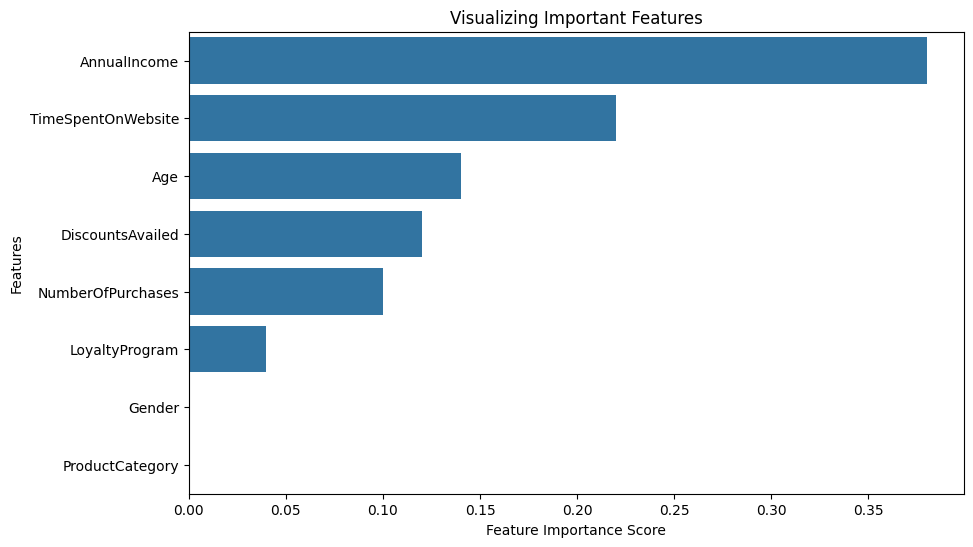

In [31]:
# Get feature importances from the trained RandomForestClassifier
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feat_imp = pd.Series(feature_importances, index=X.columns)
feat_imp.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


1.  Most Important Features:<br>
•	AnnualIncome stands out as the most important feature, with a significantly higher importance score compared to the others. This suggests that it plays a crucial role in predicting PurchaseStatus.<br>
•	TimeSpentOnWebsite also shows considerable importance, indicating that how long a customer spends on the website is a strong predictor.<br>
•	Age and DiscountsAvailed follow as moderately important features, contributing meaningfully to the model's predictions.<br>
2.   Less Important Features:<br>
•	NumberOfPurchases and LoyaltyProgram have lower importance scores but still contribute to the model.<br>
•	Gender and ProductCategory have very low feature importance scores, suggesting they contribute minimally to the model’s predictive power.



**INSIGHT**

**RandomForestClassifier appears to be a strong candidate for this task because of its high accuracy and reduced risk of overfitting compared to a single decision tree. However, GradientBoostingClassifier and AdaBoostClassifier are also excellent options, potentially offering better generalization.**